In [2]:
import matplotlib.pyplot as plt
import csv

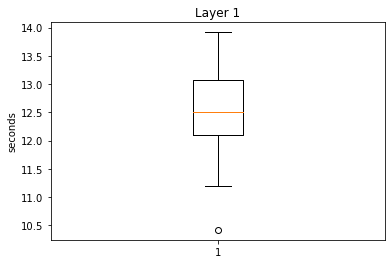

In [3]:
fpath = "../../../timing_stats/"
layer1 = []
with open(f'{fpath}SpatialTimingsLayer1.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer1.append(row[0].split(":")[-1])

layer1_stats = [float(x) for x in layer1[1:]]
plt.boxplot(layer1_stats);
plt.ylabel("seconds");
plt.title("Layer 1");

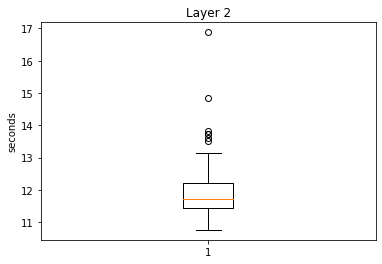

In [4]:
fpath = "../../../timing_stats/"
layer2 = []
with open(f'{fpath}SpatialTimingsLayer2.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer2.append(row[0].split(":")[-1])

layer2_stats = [float(x) for x in layer2[1:]]
plt.boxplot(layer2_stats);
plt.ylabel("seconds");
plt.title("Layer 2");

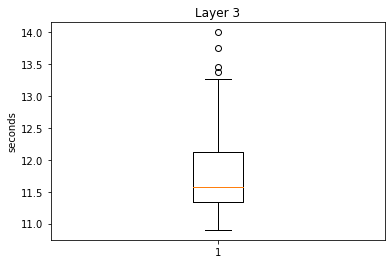

In [5]:
layer3 = []
with open(f'{fpath}SpatialTimingsLayer3.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer3.append(row[0].split(":")[-1])

layer3_stats = [float(x) for x in layer3[1:]]
plt.boxplot(layer3_stats);
plt.ylabel("seconds");
plt.title("Layer 3");

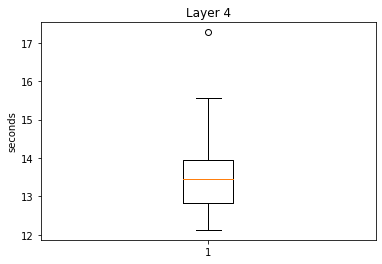

In [6]:
layer4 = []
with open(f'{fpath}SpatialTimingsLayer4.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer4.append(row[0].split(":")[-1])

layer4_stats = [float(x) for x in layer4[1:]]
plt.boxplot(layer4_stats);
plt.ylabel("seconds");
plt.title("Layer 4");

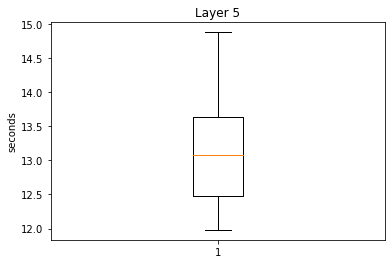

In [7]:
layer5 = []
with open(f'{fpath}SpatialTimingsLayer5.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer5.append(row[0].split(":")[-1])

layer5_stats = [float(x) for x in layer5[1:]]
plt.boxplot(layer5_stats);
plt.ylabel("seconds");
plt.title("Layer 5");

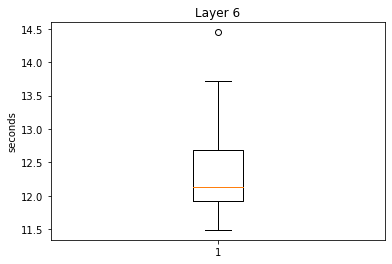

In [8]:
layer6 = []
with open(f'{fpath}SpatialTimingsLayer6.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer6.append(row[0].split(":")[-1])

layer6_stats = [float(x) for x in layer6[1:]]
plt.boxplot(layer6_stats);
plt.ylabel("seconds");
plt.title("Layer 6");

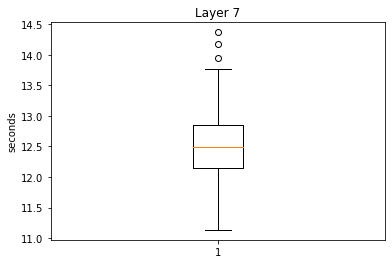

In [9]:
layer7 = []
with open(f'{fpath}SpatialTimingsLayer7.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer7.append(row[0].split(":")[-1])

layer7_stats = [float(x) for x in layer7[1:]]
plt.boxplot(layer7_stats);
plt.ylabel("seconds");
plt.title("Layer 7");

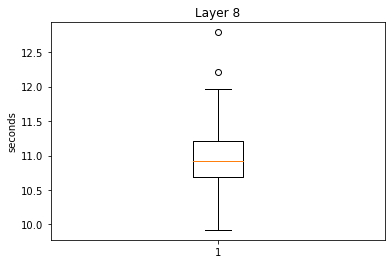

In [10]:
layer8 = []
with open(f'{fpath}SpatialTimingsLayer8.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer8.append(row[0].split(":")[-1])

layer8_stats = [float(x) for x in layer8[1:]]
plt.boxplot(layer8_stats);
plt.ylabel("seconds");
plt.title("Layer 8");

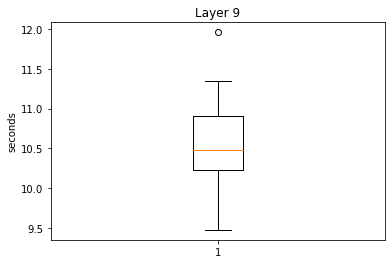

In [11]:
layer9 = []
with open(f'{fpath}SpatialTimingsLayer9.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer9.append(row[0].split(":")[-1])

layer9_stats = [float(x) for x in layer9[1:]]
plt.boxplot(layer9_stats);
plt.ylabel("seconds");
plt.title("Layer 9");

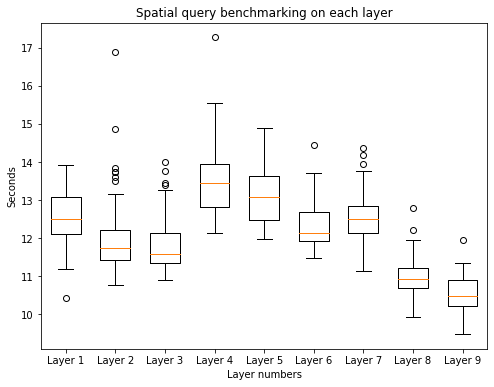

In [12]:
time_stats = [layer1_stats,
              layer2_stats,
              layer3_stats,
              layer4_stats,
              layer5_stats,
              layer6_stats,
              layer7_stats,
              layer8_stats,
              layer9_stats]

# create a figure object
fig = plt.figure(figsize=(8, 6))

# create a list of positions for each boxplot
positions = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# create the boxplot
plt.boxplot(time_stats, positions=positions, widths=0.6)

# set the x-axis label and tick labels
plt.xlabel('Layer numbers')
plt.xticks(positions, ['Layer 1',
                       'Layer 2',
                       'Layer 3',
                       'Layer 4',
                       'Layer 5',
                       'Layer 6',
                       'Layer 7',
                       'Layer 8',
                       'Layer 9'])

# set the y-axis label
plt.ylabel('Seconds')

# set the title
plt.title('Spatial query benchmarking on each layer')
plt.savefig('spatial_query_benchmarking.pdf', format='pdf');
# show the figure
plt.show()

### plot number of molecules vs. the median spatial query time

In [63]:
from scipy.optimize import curve_fit
from scipy.stats import sem

In [64]:
def line(x, a, b):
    return a*x+b

In [65]:
# Median spatial query
ydata = np.array([np.median(time_stat) for time_stat in time_stats])
yerr = np.array([sem(time_stat) for time_stat in time_stats])

In [66]:
# Number of molecules
num_molecules = np.array([99672,
                    108756,
                    113329,
                    112233,
                    105632,
                    93646,
                    77545,
                    61641,
                    47211])

num_cells = np.array([3866,
                    4095,
                    4351,
                    4512,
                    4426,
                    4085,
                    3467,
                    2806,
                    2253])

In [68]:
(popt0, pcov0) = curve_fit(line, num_molecules, ydata, sigma=yerr, absolute_sigma=True)

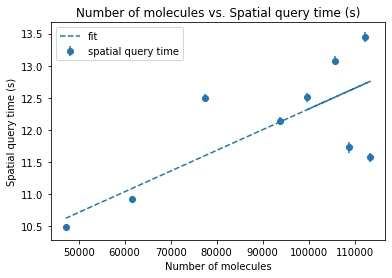

In [69]:
plt.errorbar(num_molecules, ydata, yerr, fmt="o", label="spatial query time");

# pass in x data with optimal parameters
yfit = line(num_molecules, *popt0)
plt.plot(xdata, yfit, label="fit", linestyle='--', color="C0");
plt.legend();
plt.xlabel("Number of molecules");
plt.ylabel("Spatial query time (s)");
plt.title("Number of molecules vs. Spatial query time (s)")
plt.savefig("time_vs_molecules.pdf", format="pdf", bbox_inches='tight');

In [70]:
(popt1, pcov1) = curve_fit(line, num_cells, ydata, sigma=yerr, absolute_sigma=True)

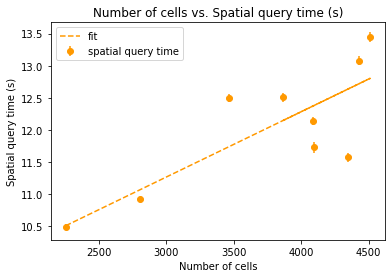

In [72]:
plt.errorbar(num_cells, ydata, yerr, fmt="o", color="#ff9900ff", label="spatial query time");

# pass in x data with optimal parameters
yfit = line(num_cells, *popt1)
plt.plot(num_cells, yfit, label="fit", linestyle='--', color="#ff9900ff");
plt.legend();
plt.xlabel("Number of cells");
plt.ylabel("Spatial query time (s)");
plt.title("Number of cells vs. Spatial query time (s)")
plt.savefig("time_vs_cells.pdf", format="pdf", bbox_inches='tight');

Text(0.5, 1.0, 'Number of molecules vs. Spatial query time (s)')

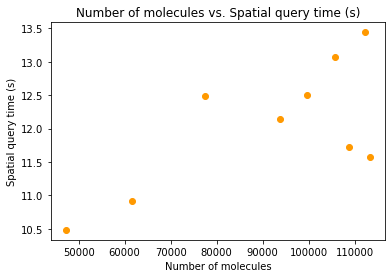

In [26]:
plt.scatter(num_molecules, median_times, color='#ff9900ff', marker='o');
plt.xlabel("Number of molecules");
plt.ylabel("Spatial query time (s)");
plt.title("Number of molecules vs. Spatial query time (s)")

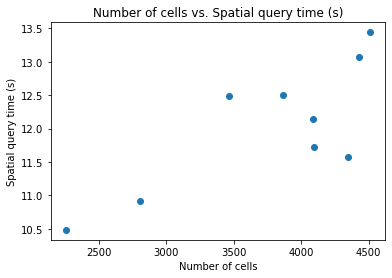

In [30]:
plt.scatter(num_cells, median_times, marker='o');
plt.xlabel("Number of cells");
plt.ylabel("Spatial query time (s)");
plt.title("Number of cells vs. Spatial query time (s)");

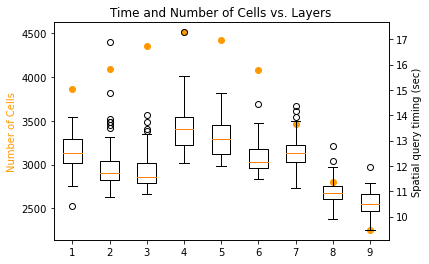

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = time_stats
x = np.arange(1, 10)

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Create a twin axis object
ax2 = ax1.twinx()

# Plot data on each axis

# ax2.plot(x, [np.mean(d) for d in data], 'ro-')
num_cells = np.array([3866,
                    4095,
                    4351,
                    4512,
                    4426,
                    4085,
                    3467,
                    2806,
                    2253])

ax1.scatter(x, num_cells, alpha=1, color='#ff9900ff', marker='o')
ax2.boxplot(data, labels=x)
# ax2.plot(x, num_molecules, 'bo-')

# Set labels and titles
ax1.set_ylabel('Number of Cells', color='#ff9900ff')
ax2.set_xlabel('Layer number')
ax2.set_ylabel('Spatial query timing (sec)')

plt.title("Time and Number of Cells vs. Layers");
plt.savefig('boxplot1.pdf', format="pdf", bbox_inches='tight');

# Show the plot
plt.show();

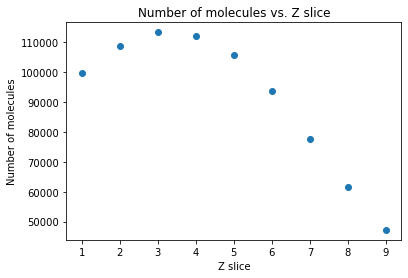

In [28]:
# Generate some sample data
data = time_stats
x = np.arange(1, 10)

# Create figure and axis objects
fig, ax1 = plt.subplots()

num_molecules = np.array([99672,
                    108756,
                    113329,
                    112233,
                    105632,
                    93646,
                    77545,
                    61641,
                    47211])

ax1.scatter(x, num_molecules, marker='o', alpha=1)
ax1.set_ylabel("Number of molecules")
ax1.set_xlabel("Z slice")
plt.title("Number of molecules vs. Z slice");
plt.savefig('molecule_vs_z.pdf', format="pdf", bbox_inches='tight');
plt.show()

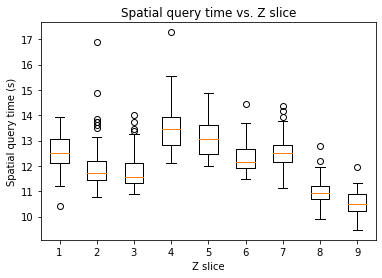

In [29]:
data = time_stats
x = np.arange(1, 10)

# Create figure and axis objects
fig, ax1 = plt.subplots()
ax1.boxplot(data, labels=x)

ax1.set_xlabel('Z slice')
ax1.set_ylabel('Spatial query time (s)')
plt.title('Spatial query time vs. Z slice');
plt.savefig('spatial_query_time.pdf', format="pdf", bbox_inches='tight');
plt.show()

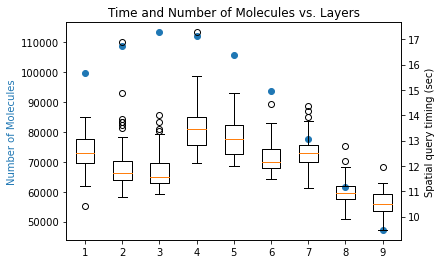

In [16]:
# Create figure and axis objects
fig, ax1 = plt.subplots()

# Create a twin axis object
ax2 = ax1.twinx()

num_molecules = np.array([99672,
                    108756,
                    113329,
                    112233,
                    105632,
                    93646,
                    77545,
                    61641,
                    47211])

ax1.scatter(x, num_molecules, marker='o', alpha=1)
ax2.boxplot(data, labels=x)
# Set labels and titles
ax1.set_ylabel('Number of Molecules', color='C0')
ax2.set_xlabel('Layer number')
ax2.set_ylabel('Spatial query timing (sec)')

plt.title("Time and Number of Molecules vs. Layers");
plt.savefig('boxplot2.pdf', format="pdf", bbox_inches='tight');
plt.show();